# Constructing fictional portfolio and plot its efficient frontier

## Import essential python libiraies

In [1]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('ggplot')

## Chosen assets and timeframe

In [2]:
# selected random assets
assets = ['BILI', 'BABA', 'TCEHY', 'WMT', 'NTDOY']

# start date
startDate = '2019-1-1'

# end date
endDate = datetime(2020, 11, 30).strftime('%Y-%m-%d')

# weights of each asset
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

print(startDate, endDate)

2019-1-1 2020-11-30


## Create a dataframe

In [3]:
df = pd.DataFrame()

# store data into the dataframe
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)['Adj Close']

df

,BILI,BABA,TCEHY,WMT,NTDOY
Date,,,,,
2019-01-02,14.280000,136.699997,39.296555,89.984993,31.949768
2019-01-03,12.950000,130.600006,38.182602,89.522263,31.682961
2019-01-04,13.700000,139.750000,40.400555,90.081413,32.064114
2019-01-07,14.270000,143.100006,40.679047,91.141884,32.788292
2019-01-08,14.780000,146.789993,40.539799,91.778145,33.102741
...,...,...,...,...,...
2020-11-23,63.320000,270.109985,74.669998,150.380295,66.339996
2020-11-24,62.840000,279.959991,75.790001,150.808746,65.820000
2020-11-25,62.009998,277.720001,74.750000,151.277039,66.599998


## Plot the dataset

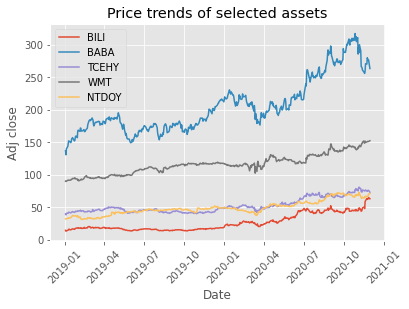

In [4]:
for asset in df.columns.values:
    plt.plot(df[asset], label=asset)

xlabel = 'Date'
ylabel = 'Adj close'
tittle = 'Price trends of selected assets'

plt.figure(figsize=(8, 6))
plt.xlabel(xlabel)
plt.xticks(rotation=45)
plt.ylabel(ylabel)
plt.title(tittle)
plt.legend(loc=0)

# plt.savefig('Price trends of interested portfolio.png', dpi=250, facecolor='w', bbox_inches='tight')

plt.show()



## Calculate the return of each stock

In [5]:
stock_returns = df.copy()

for x in stock_returns.columns:
    stock_returns[x] = np.log(stock_returns[x]) - np.log(stock_returns[x].shift(1))

stock_returns.head()

,BILI,BABA,TCEHY,WMT,NTDOY
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.097764,-0.045649,-0.028757,-0.005156,-0.008386
2019-01-04,0.056300,0.067716,0.056464,0.006227,0.011958
2019-01-07,0.040764,0.023689,0.006870,0.011704,0.022334
2019-01-08,0.035115,0.025459,-0.003429,0.006957,0.009545


In [6]:
# corvariance matrix of the portfolio
cov_matrix = stock_returns.cov()
cov_matrix

,BILI,BABA,TCEHY,WMT,NTDOY
BILI,0.001186,0.000385,0.000334,0.000125,0.000162
BABA,0.000385,0.000489,0.000336,0.000088,0.000115
TCEHY,0.000334,0.000336,0.000471,0.000103,0.000162
WMT,0.000125,0.000088,0.000103,0.000242,0.000099
NTDOY,0.000162,0.000115,0.000162,0.000099,0.000428


In [7]:
# variance of the portfolio
port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
port_var

0.00026527199359376486

In [8]:
# volatility of the portfolio
port_std = np.sqrt(port_var)
port_std

0.016287172670349046